<a href="https://colab.research.google.com/github/LazyHooks/models_aon_bin/blob/main/tier_1_it_tr_attr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [79]:

from numpy import loadtxt
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [80]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


load data

In [81]:
dataset = pd.read_csv('Attr_tier1_binary.csv')

split

In [82]:
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, -1].values

split

In [83]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

fit

In [84]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

print the model

In [85]:
print(model.feature_importances_)

[0.04757243 0.01460847 0.0408265  0.01494589 0.         0.02061565
 0.09041059 0.         0.06697252 0.02820572 0.02490704 0.04619531
 0.04357365 0.02231867 0.01411356 0.01033418 0.05608341 0.
 0.06027589 0.02363533 0.21842581 0.         0.06759777 0.
 0.07532213 0.00851966 0.00453986 0.         0.        ]


feature importance & weights

In [86]:
#0 Jr
#1 Mid
#2 Pay Positioning <20
#3 Pay Positioning 20<x<40
#4 Pay Positioning 40<X<60
#5 Pay Positioning 60<X<80
#6 Pay Positioning <80
#7 Pay Range <20
#8 Pay Range 20<x<40
#9 Pay Range 40<X<60
#10 Pay Range 60<X<80
#11 Pay Range <80
#12 Internal
#13 Balanced
#14 External
#15 Pay Mix <20
#16 Pay Mix 20<x<40
#17 Pay Mix 40<X<60
#18 Pay Mix 60<X<80
#19 Pay Mix <80
#20 Pay Differentiation <20
#21 Pay Differentiation 20<x<40
#22 Pay Differentiation 40<X<60
#23 Pay Differentiation 60<X<80
#24 Pay Differentiation <80
#25 transparency 1
#26 transparency 2
#27 transparency 3
#28 transparency 4

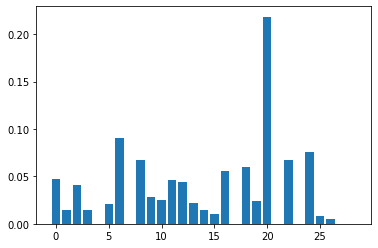

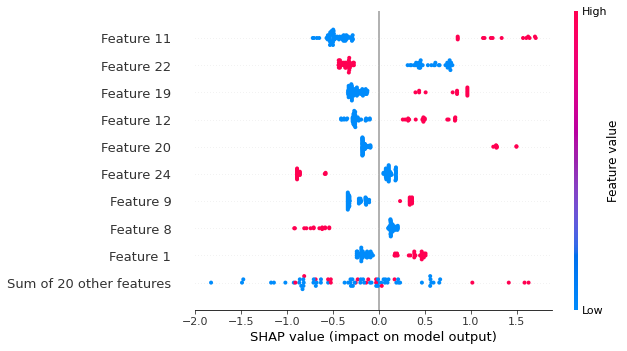

In [87]:
from matplotlib import pyplot
from xgboost import plot_importance
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values)
	


predict

In [88]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

evaluate predictions

In [89]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

from sklearn.metrics import precision_score
precision = precision_score(y_test, predictions, average='binary')
print('Precision: %.3f' % precision)

from sklearn.metrics import recall_score
recall = recall_score(y_test, predictions, average='binary')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(y_test, predictions, average='binary')
print('F-Measure: %.3f' % score)

Accuracy: 84.00%
Precision: 0.333
Recall: 0.333
F-Measure: 0.333


visualise single

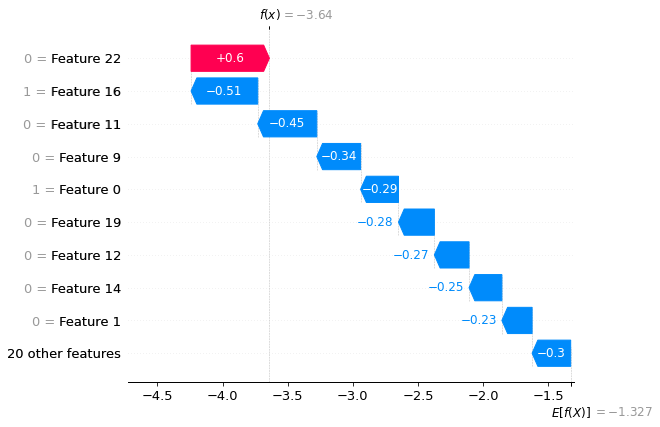

In [90]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

predict 1

In [91]:
#singlepred = model.predict([[0,1,1,1,1,0,0,5,5]])
#singleprediction = [round(value) for value in y_pred]
#print(singlepred)